[Stock Market Clustering With Python](https://www.youtube.com/watch?v=PSIqZeLrQxo) by NeuralNine

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [2]:
# Import data
stock_symbols = [f"stock{i}" for i in range(50)]
df = pd.read_csv('prices.txt', engine='python', sep='   ', header=None, names=stock_symbols)
df

,stock0,stock1,stock2,stock3,stock4,stock5,stock6,stock7,stock8,stock9,...,stock40,stock41,stock42,stock43,stock44,stock45,stock46,stock47,stock48,stock49
0,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
1,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
2,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
3,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
4,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13.69,67.73,46.64,45.72,52.42,10.07,18.05,48.42,69.00,56.19,...,30.73,75.82,10.63,61.35,32.85,50.57,64.36,33.74,33.83,53.47
496,13.58,67.75,46.65,45.71,52.57,10.07,17.99,47.65,69.04,56.00,...,30.70,76.46,10.65,61.20,32.60,50.54,64.65,33.78,33.42,53.91
497,13.69,67.83,46.66,45.66,52.38,10.02,18.02,46.87,68.95,56.09,...,30.70,75.16,10.75,60.82,32.79,50.42,64.28,33.60,33.75,54.22
498,13.55,67.61,46.73,45.62,52.29,10.02,18.03,46.21,69.03,56.51,...,30.69,76.09,10.68,60.73,32.45,50.31,63.60,33.79,33.53,54.50


In [3]:
split = round(0.7 * len(df))
train_df = df.iloc[:split]
test_df = df.iloc[split:]

print(train_df.shape)
print(test_df.shape)

(350, 50)
(150, 50)


In [4]:
days_shifted = 1

daily_movements = df.apply(lambda col: col - col.shift(days_shifted), axis=0)
daily_movements = daily_movements.T
daily_movements.dropna(axis=1, inplace=True)

print(daily_movements.shape)       # NOTE: input_arr should be of shape (num_samples, num_features)
daily_movements.head()

(50, 499)


,1,2,3,4,5,6,7,8,9,10,...,490,491,492,493,494,495,496,497,498,499
stock0,0.02,-0.01,0.06,0.11,-0.02,0.05,0.12,-0.03,-0.09,-0.07,...,0.22,0.07,-0.06,0.16,0.03,-0.07,-0.11,0.11,-0.14,-0.15
stock1,0.45,0.25,0.16,-0.52,0.36,-0.13,-0.85,-0.35,0.15,0.08,...,0.04,-0.73,0.72,0.29,0.16,0.54,0.02,0.08,-0.22,-0.28
stock2,0.06,-0.04,-0.06,-0.02,0.01,-0.02,0.02,-0.01,0.01,0.01,...,0.01,0.01,0.04,0.06,0.07,0.06,0.01,0.01,0.07,-0.01
stock3,-0.02,0.12,0.13,-0.10,-0.13,0.03,0.02,0.00,-0.05,-0.10,...,0.16,-0.03,-0.02,0.02,0.10,0.01,-0.01,-0.05,-0.04,0.11
stock4,-0.04,-0.26,-0.14,0.31,-0.04,-0.09,0.35,-0.06,0.21,-0.01,...,0.01,-0.23,-0.18,0.11,0.02,0.23,0.15,-0.19,-0.09,0.01


### Clustering Model

In [5]:
# Clustering params
num_clusters = 8
max_iter = 100_000

# Plot params
num_rows = 2
num_cols = 4

normalizer = Normalizer()
clustering_model = KMeans(n_clusters=num_clusters, max_iter=max_iter)
pipeline = make_pipeline(normalizer, clustering_model)
pipeline.fit(daily_movements)
labels = pipeline.predict(daily_movements)

In [11]:
cluster_results = pd.DataFrame({
    'clusters': labels,
    'stocks': stock_symbols
}).sort_values(by=['clusters'], axis=0)

cluster_results.head()

,clusters,stocks
1,0,stock1
7,0,stock7
17,0,stock17
33,0,stock33
43,0,stock43


In [7]:
def get_cluster_data(df, cluster_i):
    indexes = cluster_results['clusters'] == cluster_i
    stocks = cluster_results.loc[indexes]['stocks']
    return df[stocks]

# Test function by printing cluster data
target_cluster = 1
print(get_cluster_data(daily_movements.T, target_cluster).values.mean())
print(get_cluster_data(daily_movements.T, target_cluster).values.std())
get_cluster_data(daily_movements.T, target_cluster)

0.01000668002672011
0.31004395569724486


,stock45,stock29,stock41
1,-0.04,0.03,0.21
2,-0.09,0.09,0.37
3,-0.09,0.03,-0.02
4,0.04,-0.01,0.00
5,-0.04,-0.11,-0.44
...,...,...,...
495,-0.27,-0.06,0.74
496,-0.03,0.04,0.64
497,-0.12,-0.04,-1.30
498,-0.11,-0.03,0.93


/tmp/ipykernel_517266/1936541469.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


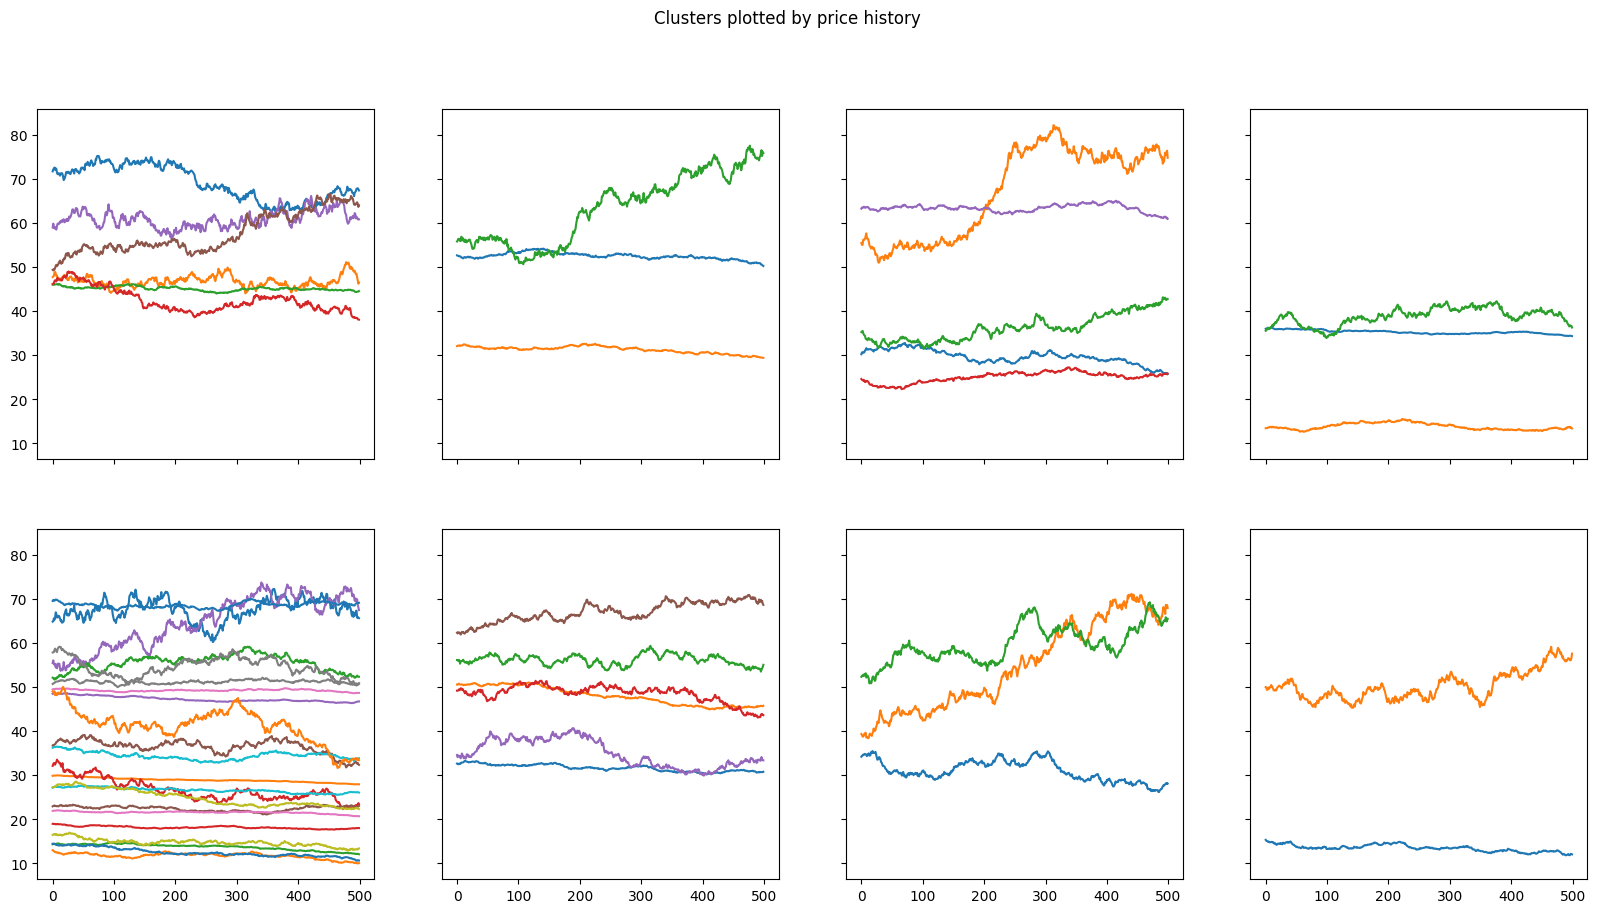

In [8]:
fig, axs = plt.subplots(num_rows, num_cols, sharex=True, sharey=True, figsize=((20,10)))
for i in range(num_clusters):
    row, col = int(i / num_cols), int(i % num_cols)
    axs[row, col].plot(get_cluster_data(df, i))

fig.suptitle(f"Clusters plotted by price history")
fig.show()

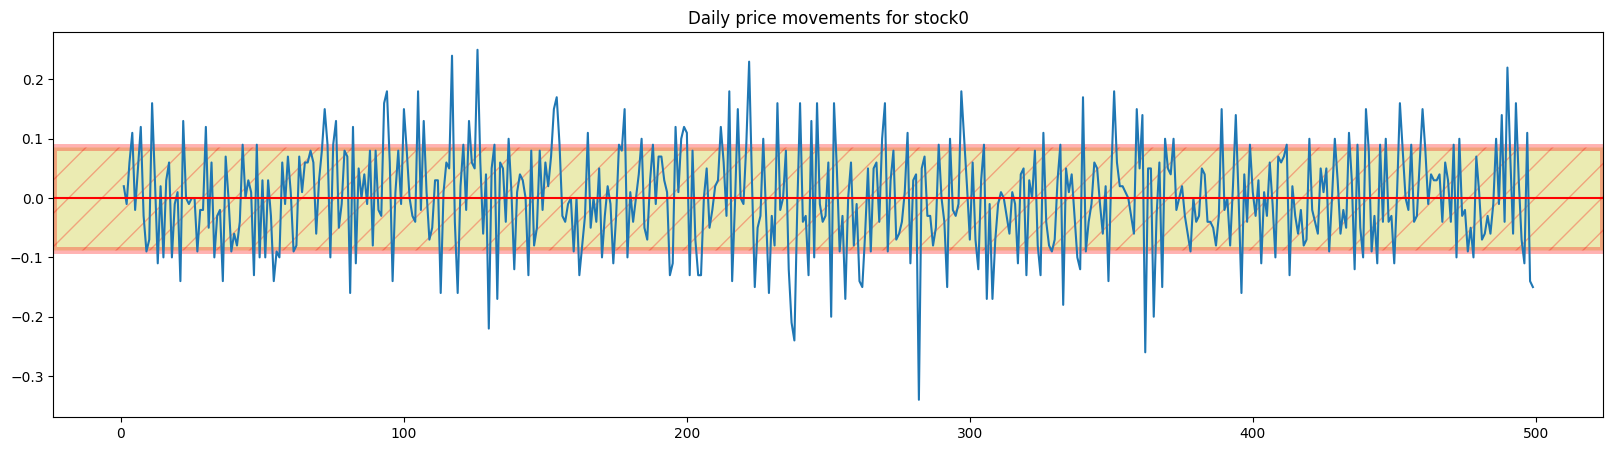

In [9]:
test_daily_movements = daily_movements.loc[stock_symbols[0]]

test_mean = test_daily_movements.mean()
test_stdev = test_daily_movements.std()
range_top, range_bottom = test_mean + test_stdev, test_mean - test_stdev

test_title = f"Daily price movements for {stock_symbols[0]}"
plt.figure(num=test_title, figsize=(20,5))
plt.title(test_title)
plt.plot(test_daily_movements)
# Add mean line + range coloring
plt.axhline(y=test_mean, color='r', linestyle='-')
plt.axhspan(ymin=range_bottom, ymax=range_top, facecolor='y', alpha=0.3, hatch='/', edgecolor='r', linewidth=5)

plt.show()

/tmp/ipykernel_517266/517981975.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


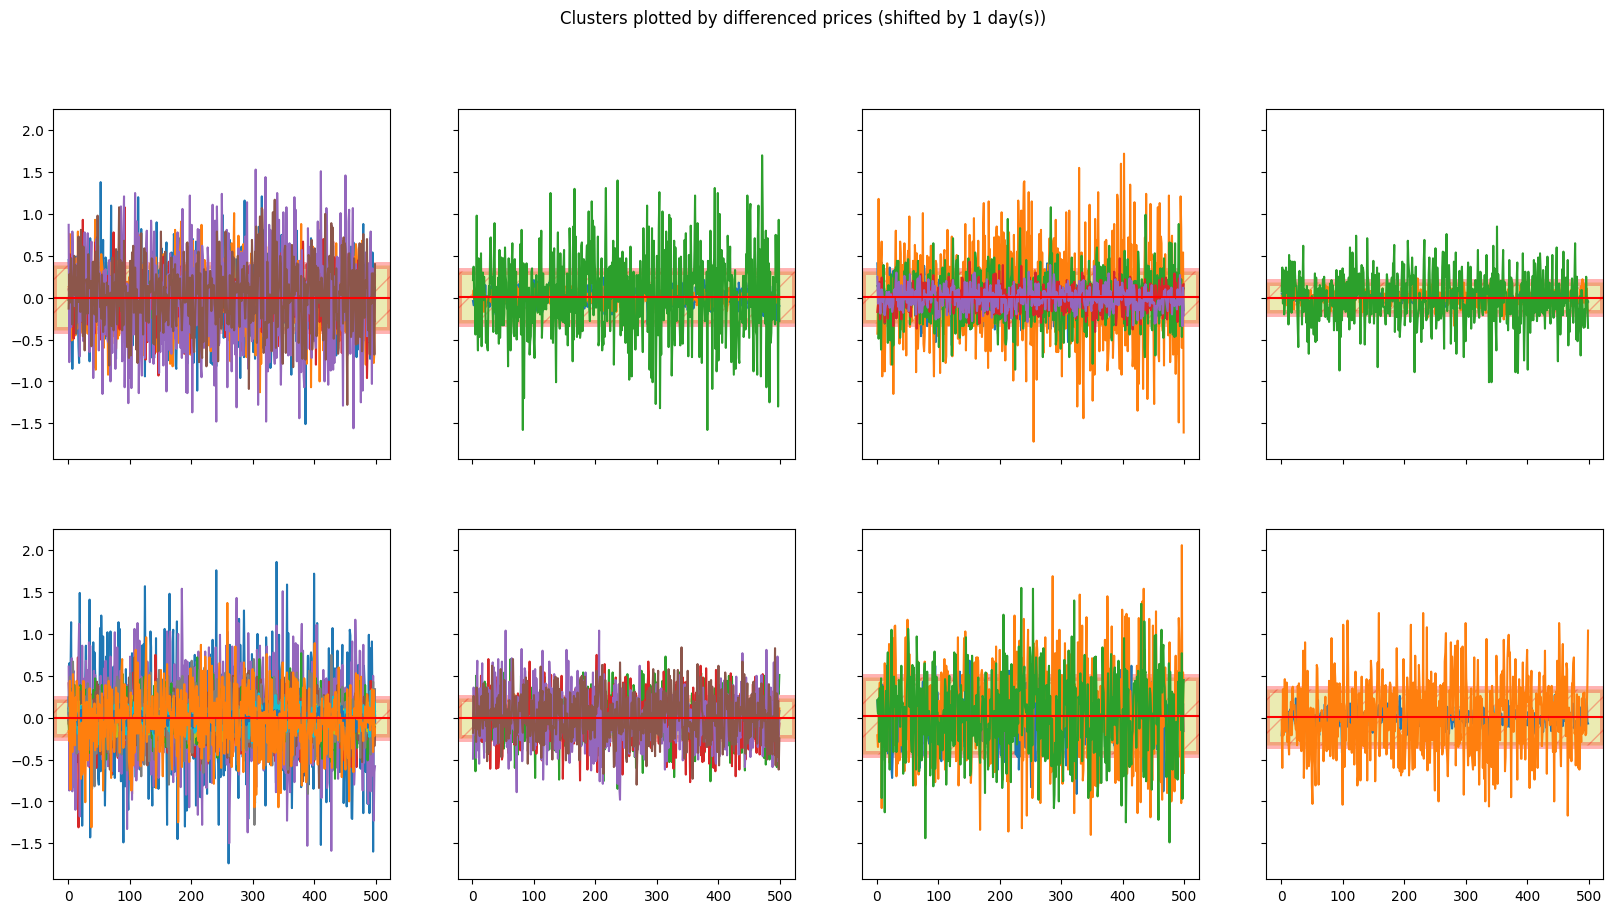

In [10]:
fig, axs = plt.subplots(num_rows, num_cols, sharex=True, sharey=True, figsize=(20,10))
for i in range(num_clusters):
    row, col = int(i / num_cols), int(i % num_cols)
    # Compute cluster stats
    cluster_daily_movements = get_cluster_data(daily_movements.T, i)
    cluster_mean = cluster_daily_movements.values.mean()
    cluster_stdev = cluster_daily_movements.values.std()
    range_top, range_bottom = cluster_mean + cluster_stdev, cluster_mean - cluster_stdev

    axs[row, col].plot(get_cluster_data(daily_movements.T, i))
    axs[row, col].label_outer()

    # Add mean line + range coloring
    axs[row, col].axhline(y=cluster_mean, color='r', linestyle='-')
    axs[row, col].axhspan(
        ymin=range_bottom, ymax=range_top, facecolor='y', alpha=0.3, hatch='/', edgecolor='r', linewidth=5)

fig.suptitle(f"Clusters plotted by differenced prices (shifted by {days_shifted} day(s))")
fig.show()